In [596]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import geopandas as gpd

# Electric vehicles analysis
## Will EV be the choice of car for consumers in the foreseable future?


Over the last couple of years the electric vehicle market has grown to become a US$561.3bn worldwide. In the UK, the vehicle market has increased steadily after the pandemic with around now xxx electic and plug in electric vehicles now in the road and account for around %xx of overall vehicles in the road.

Manufactures have increased the number of EV models given consumer a greater choice, the number public electric charging has grown and consumers have used grants and lower running cost to offset the initial cost of electric vehicles.

As the market continues to increase we now need to analyse if the infrastructure is in place to support an increasing demand for electric chargers and the rise of cost of living specifically the cost of electricity will have an impact on consumer demand for electric vehicles.


# New vehicles registrations 
### Electric and Plug in new vehicles registration now are double of diesel vehicles

In [601]:
#Import vehicle registration data
veh_reg=pd.read_csv('vehicle_registration_2014Q3_2023Q2.csv')
#Check shape and given shape has 42 columns, for the purposes of visualisation I will unpivot the file
veh_reg.shape

(53195, 41)

In [607]:
veh_reg.head()

,BodyType,Make,GenModel,Model,Fuel,2023Q2,2023Q1,2022Q4,2022Q3,2022Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,0,0,0,0,0,...,59,100,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,0,0,0,0,0,...,10,26,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#Unpivot the file and run the info function to check if there are any null values and check data types
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915020 entries, 0 to 1915019
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   BodyType      object
 1   Make          object
 2   GenModel      object
 3   Model         object
 4   Fuel          object
 5   YearQuarter   object
 6   Registration  int64 
dtypes: int64(1), object(6)
memory usage: 102.3+ MB


In [609]:
#Checking the number of registration by body type and cars have by far the largest number of registrations 
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').groupby(['BodyType'])['Registration'].sum()

BodyType
Buses and coaches          65379
Cars                    19847035
Heavy goods vehicles      437870
Light goods vehicles     3188722
Motorcycles              1103981
Other vehicles            494821
Name: Registration, dtype: int64

In [610]:
#Make a copy of the file
cars_data=veh_reg.copy()
#Unpivot data to have the date as rows rather than columns
cars_data=pd.melt(cars_data,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration')
#Filter for only cars
cars_data=cars_data[cars_data['BodyType']=='Cars']
#Add a column for the year
cars_data['Year']=cars_data['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_data['Quarter']=cars_data['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_data.loc[cars_data['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_data.loc[cars_data['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_data.loc[cars_data['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Show sample of the data
cars_data.sample(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Registration,Year,Quarter
1764077,Cars,DS,DS DS4,DS4 PRESTIGE THP S/S AUTO,Petrol,2015Q1,0,2015,Q1
1478666,Cars,SMART,SMART FORFOUR,FORFOUR PROXY PRM+ NGHTSKY T A,Petrol,2016Q3,1,2016,Q3
1668606,Cars,HYUNDAI,HYUNDAI TUCSON,TUCSON SE NAV T-GDI 2WD,Petrol,2015Q3,0,2015,Q3
341261,Cars,JEEP,JEEP COMPASS,COMPASS NIGHTEGLE M-JET II 4X2,Diesel,2021Q4,0,2021,Q4
359872,Cars,SEAT,SEAT ALTEA,ALTEA SE CR TDI,Diesel,2021Q4,0,2021,Q4
1885788,Cars,KIA,KIA SORENTO,SORENTO XT,Diesel,2014Q3,0,2014,Q3
1271923,Cars,VOLKSWAGEN,VOLKSWAGEN CARAVELLE,CARAVELLE EXECUTIVE TSI BMT,Petrol,2017Q3,0,2017,Q3
273713,Cars,DACIA,DACIA DUSTER,DUSTER COMFORT LPG TCE 4X2,Other fuel types,2022Q1,184,2022,Q1
552263,Cars,IVECO,IVECO DAILY,DAILY 50C15,Diesel,2020Q4,0,2020,Q4
1277723,Cars,AUDI,AUDI A3,A3 SE TFSI,Petrol,2017Q2,718,2017,Q2


In [631]:
fuel_registration=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_registration=fuel_registration[~fuel_registration['Year'].isin(['2014','2023'])]
fuel_registration['Registration']=fuel_registration['Registration']/1000

In [632]:
total_reg_year=fuel_registration.groupby(['Year'])['Registration'].sum().reset_index(['Year'])
total_reg_year.rename(columns={'Registration':'TotalRegistrations'},inplace=True)
total_reg_year

,Year,TotalRegistrations
0,2015,2661.020
1,2016,2723.774
2,2017,2564.330
3,2018,2394.042
4,2019,2346.576
5,2020,1656.403
6,2021,1677.245
7,2022,1652.128


In [633]:
years=total_reg_year['Year'].to_list()
market_share=pd.merge(fuel_registration,total_reg_year,how='left',on='Year')
market_share['MarketShare']= market_share['Registration']*100/market_share['TotalRegistrations']
market_share.head(10)

,Fuel,Year,Registration,TotalRegistrations,MarketShare
0,Battery electric,2015,10.091,2661.020,0.379215
1,Battery electric,2016,10.429,2723.774,0.382888
2,Battery electric,2017,13.913,2564.330,0.542559
3,Battery electric,2018,15.756,2394.042,0.658134
4,Battery electric,2019,38.007,2346.576,1.619679
5,Battery electric,2020,107.913,1656.403,6.514900
6,Battery electric,2021,190.420,1677.245,11.353142
7,Battery electric,2022,266.875,1652.128,16.153409
8,Diesel,2015,1284.010,2661.020,48.252550
9,Diesel,2016,1293.690,2723.774,47.496231


In [634]:
# Create function to create palettes for my graphs
def custom_palette(df,colours,hue):
    hue_values=sorted(df[hue].unique())
    colours=colours
    colour_palette={}
    if abs(len(hue_values)-len(colours))>0:
        raise Exception(f'Length of colours and categories must match: Colour lenght is {len(colours)}, category length is {len (hue_values)}')
    else:
        for colour,hue in zip(colours,hue_values):
            colour_palette[hue]=colour
        return colour_palette


/var/folders/k2/fn7dv9hn2ks8cctc5xh1cp4m0000gn/T/ipykernel_1345/760208209.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels);


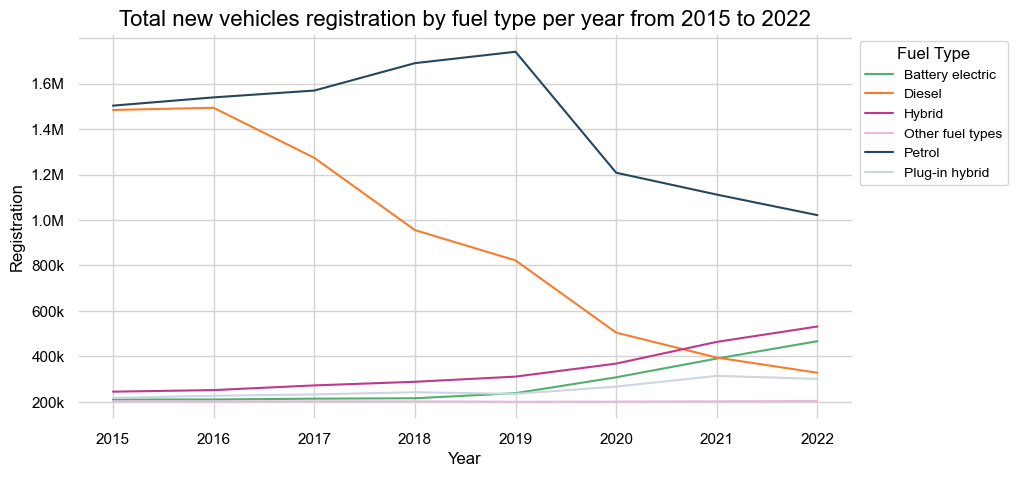

In [643]:
#Set the palette for the graphs
colours=['#4fb06d','#F77d2e','#BE398D','#EBB8DD','#26465f','#CBD6E2']
new_palette=custom_palette(market_share,colours,hue='Fuel')

#Plot information
plt.figure(figsize=(10,5))
plt.title('Total new vehicles registration by fuel type per year from 2015 to 2022',size=16);
ax=sns.lineplot(data=fuel_registration,x='Year',y='Registration',hue='Fuel',hue_order=sorted(market_share['Fuel'].unique()),
                errorbar=None,palette=new_palette)
#Set the colour 
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white','text.color':'black','axes.labelcolor':'black',
            'xtick.color':'black','ytick.color':'black','grid.color':'lightgrey'})
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))
y_labels = [item.get_text() for item in ax.get_yticklabels()]
y_labels=['0','200k','400k','600k','800k','1.0M','1.2M','1.4M','1.6M']
ax.set_yticklabels(y_labels);

['−200',
 '200k',
 '200',
 '400',
 '600',
 '800',
 '1000',
 '1200',
 '1400',
 '1600',
 '1800']

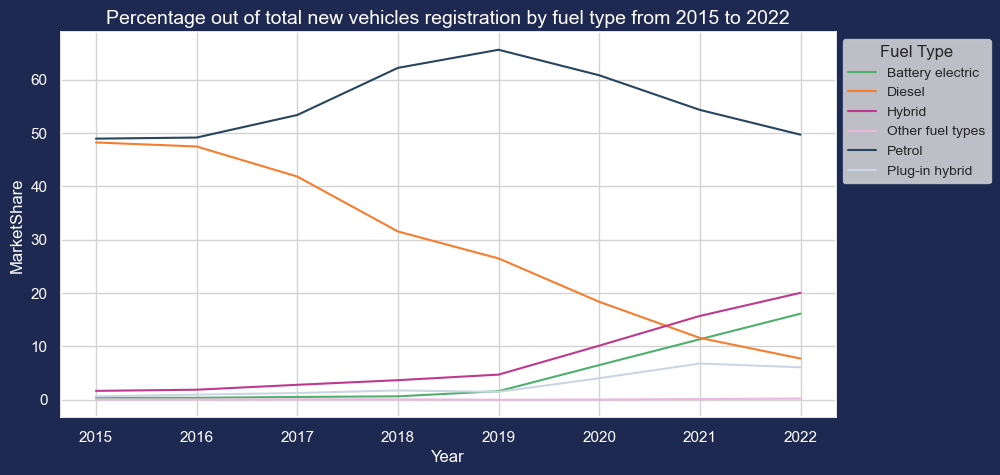

In [104]:
plt.figure(figsize=(10,5));
plt.title('Percentage out of total new vehicles registration by fuel type from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=market_share,x='Year',y='MarketShare',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))


In [111]:
quarter_change=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'YoY']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['YoY']=quarter_change['YoY']*100/quarter_change['Registration']
quarters=sorted(quarter_change['Year'].unique())
quarter_change=quarter_change[~quarter_change['Year'].isin(['2014','2023'])]
quarter_change=quarter_change[quarter_change['Fuel'].isin(['Battery electric','Hybrid'])]

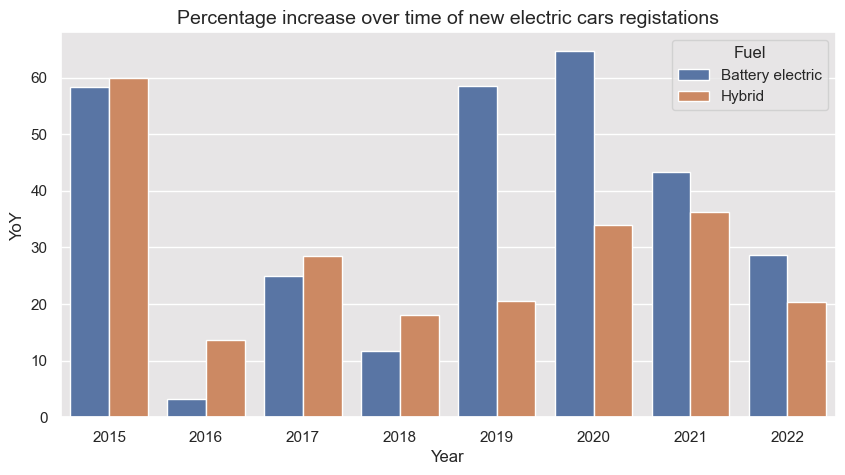

In [112]:
plt.figure(figsize=(10,5));
plt.title('Percentage increase over time of new electric cars registations',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data=quarter_change,x='Year',y='YoY',hue='Fuel')

In [209]:
models_reg=cars_data.groupby(by=['Make','GenModel','Fuel','Year'])['Registration'].sum().reset_index(level=['Make','Fuel','Year','GenModel'])
models_reg=models_reg.loc[(models_reg['Registration']>0) & (~models_reg['GenModel'].str.contains('MODEL MISSING'))]

In [228]:
top_brands=cars_data[cars_data['Year'].isin(['2019','2020','2021','2022'])].groupby(by=['Make'])['Registration'].sum().sort_values(ascending=False)
top_brands=list(top_brands[:10].index)

['FORD',
 'VOLKSWAGEN',
 'BMW',
 'AUDI',
 'MERCEDES',
 'TOYOTA',
 'VAUXHALL',
 'KIA',
 'NISSAN',
 'HYUNDAI']

In [280]:
make_reg=models_reg[models_reg['Make'].isin(top_brands)].groupby(by=['Fuel','Year'])['GenModel'].agg(['count']).reset_index(level=['Fuel','Year'])
make_reg.rename(columns={'count':'CountModels'},inplace=True)
make_reg=make_reg.loc[(~make_reg['Fuel'].isin(['Other fuel types','Diesel','Petrol'])) & (make_reg['Year'].isin(['2019','2020','2021','2022'])) ]
make_reg=make_reg.sort_values(by=['Year','CountModels','Fuel'])

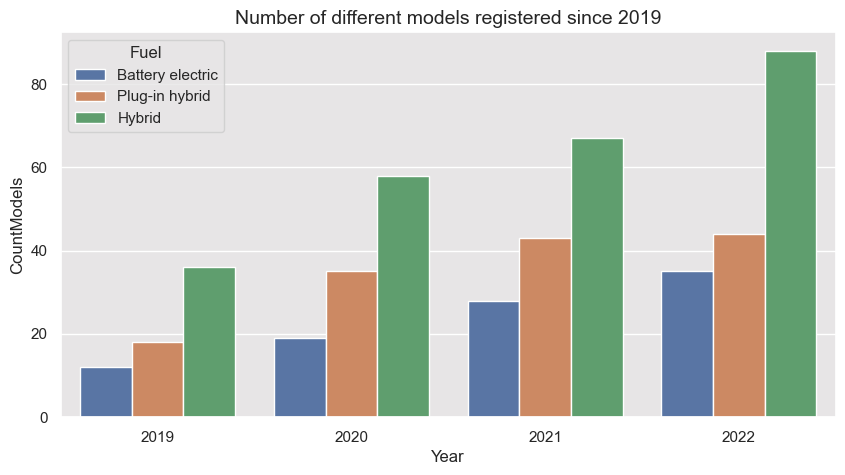

In [281]:
plt.figure(figsize=(10,5));
plt.title('Number of different models registered since 2019',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data=make_reg,x='Year',y='CountModels',hue='Fuel')

In [526]:
total_chargers_raw=pd.read_csv('total_chargers_uk_jan_2023.csv')
total_uk=rapid_chargers_raw.iloc[0,:]
total_chargers_raw.head(10)

,Local Authority / Region Code,Local Authority / Region Name,Jan-23 \n(Total Charging Devices) [Note 2],"Jan-23 \n(per 100,000 population) [Note 3]",Oct-22\n(Total Charging Devices),"Oct-22\n(per 100,000 population)",July-22 \n(Total Charging Devices),"July-22 \n(per 100,000 population)",Apr-22 \n(Total Charging Devices),"Apr-22 \n(per 100,000 population)",...,Oct-20 \n(Total Charging Devices),"Oct-20 \n(per 100,000 population)",July-20 \n(Total Charging Devices),"July-20 \n(per 100,000 population)",Apr-20 \n(Total Charging Devices),"Apr-20 \n(per 100,000 population)",Jan-20 \n(Total Charging Devices),"Jan-20 \n(per 100,000 population)",Oct-19 \n(Total Charging Devices),"Oct-19 \n(per 100,000 population)"
0,K02000001,United Kingdom,"37,055",55.3,"34,637",51.6,"32,011",47.7,"30,290",45.2,...,"19,487",29.2,"18,265",27.3,"17,947",27.0,"16,505",24.8,"15,116",22.8
1,K03000001,Great Britian,"36,689",56.3,"34,295",52.6,"31,683",48.6,"29,942",45.9,...,"19,169",29.5,"17,953",27.7,"17,642",27.3,"16,210",25.1,"14,821",23.0
2,E92000001,England,"31,466",55.7,"29,774",52.7,"27,502",48.6,"25,884",45.8,...,"16,456",29.2,"15,395",27.3,"14,979",26.8,"13,719",24.5,"12,549",22.4
3,E12000001,North East,"1,253",47.3,"1,142",42.6,"1,155",43.1,"1,011",37.7,...,849,31.8,812,30.4,786,29.6,752,28.3,738,27.8
4,E06000047,County Durham,229,43.9,206,38.6,174,32.6,149,27.9,...,106,20.0,105,19.8,102,19.4,96,18.2,92,17.5
5,E06000005,Darlington,68,62.8,54,50.3,49,45.6,31,28.9,...,29,27.2,28,26.2,28,26.3,27,25.3,27,25.3
6,E06000001,Hartlepool,24,25.9,8,8.5,11,11.7,12,12.8,...,6,6.4,6,6.4,6,6.4,5,5.4,5,5.4
7,E06000002,Middlesbrough,51,35.5,33,23.4,38,26.9,34,24.1,...,29,20.6,29,20.6,29,20.6,27,19.2,25,17.8
8,E06000057,Northumberland,251,78.1,220,67.9,226,69.8,198,61.1,...,162,50.2,152,47.1,149,46.5,138,43.1,139,43.4
9,E06000003,Redcar and Cleveland,37,27.1,45,32.8,40,29.1,36,26.2,...,24,17.5,20,14.6,20,14.6,17,12.4,17,12.4


In [527]:
regions=list(total_chargers_raw.loc[(total_chargers_raw['Local Authority / Region Code'].str.contains('E12')),
                   'Local Authority / Region Name'])
regions

['North East',
 'North West',
 'Yorkshire and the Humber',
 'East Midlands',
 'West Midlands',
 'East of England',
 'London',
 'South East',
 'South West']

In [561]:
total_chargers=total_chargers_raw.copy()
total_chargers=total_chargers[total_chargers['Local Authority / Region Name'].isin(regions)]
total_chargers.replace(to_replace=',',value='',inplace=True,regex=True)
#rapid_chargers=rapid_chargers.replace('x',0.0)
#rapid_chargers=rapid_chargers.replace('-',0.0)
#rapid_chargers[rapid_chargers['Local Authority / Region Name'].str.contains('abolished')]
#rapid_chargers=rapid_chargers.fillna(0.0)
total_chargers

,Local Authority / Region Code,Local Authority / Region Name,Jan-23 \n(Total Charging Devices) [Note 2],"Jan-23 \n(per 100,000 population) [Note 3]",Oct-22\n(Total Charging Devices),"Oct-22\n(per 100,000 population)",July-22 \n(Total Charging Devices),"July-22 \n(per 100,000 population)",Apr-22 \n(Total Charging Devices),"Apr-22 \n(per 100,000 population)",...,Oct-20 \n(Total Charging Devices),"Oct-20 \n(per 100,000 population)",July-20 \n(Total Charging Devices),"July-20 \n(per 100,000 population)",Apr-20 \n(Total Charging Devices),"Apr-20 \n(per 100,000 population)",Jan-20 \n(Total Charging Devices),"Jan-20 \n(per 100,000 population)",Oct-19 \n(Total Charging Devices),"Oct-19 \n(per 100,000 population)"
3,E12000001,North East,1253,47.3,1142,42.6,1155,43.1,1011,37.7,...,849,31.8,812,30.4,786,29.6,752,28.3,738,27.8
17,E12000002,North West,2316,31.2,2188,29.7,2004,27.2,1883,25.6,...,1403,19.1,1476,20.1,1412,19.4,1279,17.5,1204,16.5
61,E12000003,Yorkshire and the Humber,1946,35.5,1839,33.3,1614,29.2,1514,27.4,...,996,18.1,951,17.3,900,16.4,775,14.1,664,12.1
86,E12000004,East Midlands,1903,39.0,1842,37.9,1718,35.3,1627,33.4,...,1029,21.3,962,19.9,925,19.3,862,17.9,743,15.5
134,E12000005,West Midlands,2825,47.4,2516,42.2,2156,36.2,2020,33.9,...,1141,19.2,1030,17.4,984,16.7,891,15.1,815,13.8
169,E12000006,East of England,2380,37.5,2269,36.2,2083,33.2,1887,30.1,...,1229,19.7,1119,17.9,1069,17.2,963,15.5,909,14.7
220,E12000007,London,11521,131.0,11028,122.5,10482,116.4,10020,111.3,...,5655,63.1,5151,57.5,5069,56.9,4773,53.6,4360,48.9
256,E12000008,South East,4804,51.7,4562,49.5,4057,44.0,3831,41.6,...,2649,28.9,2478,27.0,2437,26.7,2143,23.5,1966,21.5
327,E12000009,South West,2518,44.1,2388,42.2,2233,39.5,2091,36.9,...,1505,26.8,1416,25.2,1397,24.9,1281,22.9,1150,20.5


In [562]:
col_names=list(total_chargers.columns)
col_names[2:]
total_chargers[col_names[2:]]=total_chargers[col_names[2:]].apply(pd.to_numeric)

In [563]:
for i in list(range(2,len(col_names),2)):
    print(sum(total_chargers[col_names[i]])-(float(total_uk.str.replace(',','')[i])))

-5589.0
-4863.0
-4509.0
-4406.0
-4216.0
-4002.0
-3811.0
-3529.0
-3316.0
-3031.0
-2870.0
-2968.0
-2786.0
-2567.0


In [565]:
dic_names={}
for col in col_names[2::8]:
    dic_names[col]='20'+col[4:6]
dic_names

col_names_pivot=col_names[0:2]+col_names[2::8]

total_charging_devices=total_chargers[col_names_pivot].rename(columns=dic_names).melt(id_vars=col_names[0:2],var_name='Year',value_name='ChargingDevices')

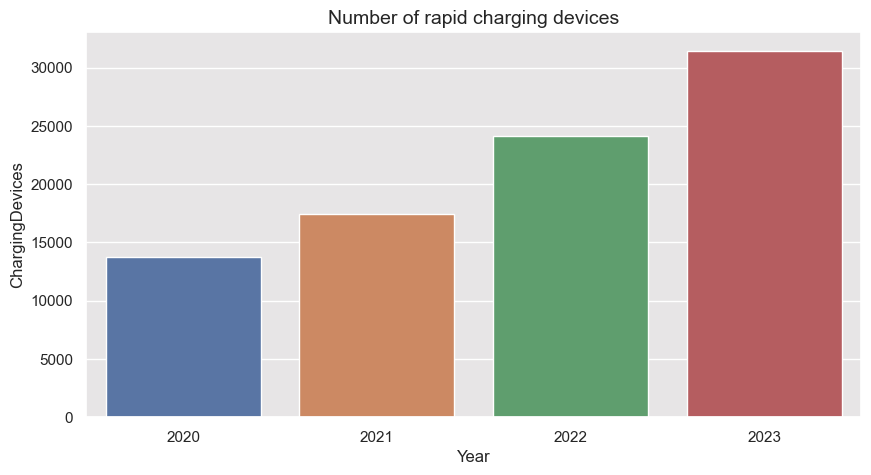

In [567]:
data=total_charging_devices.groupby(by='Year')['ChargingDevices'].sum().to_frame().reset_index()
plt.figure(figsize=(10,5));
plt.title('Number of rapid charging devices',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data,x='Year',y='ChargingDevices')

In [577]:
total_charging_devices.replace(['Yorkshire and the Humber','East of England'],['Yorkshire and The Humber','Eastern'],inplace=True)

In [502]:
dic_names={}
for col in col_names[3::8]:
    dic_names[col]='20'+col[4:6]
dic_names

col_names_pivot=col_names[0:2]+col_names[3::8]

rapid_charging_density=rapid_chargers[col_names_pivot].rename(columns=dic_names).melt(id_vars=col_names[0:2],var_name='Year',value_name='RapidChargingPer100kPopulation')

,Local Authority / Region Code,Local Authority / Region Name,Year,ChargingDevices
0,E12000001,North East,2023,1253
1,E12000002,North West,2023,2316
2,E12000003,Yorkshire and the Humber,2023,1946
3,E12000004,East Midlands,2023,1903
4,E12000005,West Midlands,2023,2825
5,E12000006,East of England,2023,2380
6,E12000007,London,2023,11521
7,E12000008,South East,2023,4804
8,E12000009,South West,2023,2518
9,E12000001,North East,2022,975


In [573]:
map_data = gpd.read_file('geo_regions.json')
map_data

,id,EER13CD,EER13CDO,EER13NM,geometry
0,E15000001,E15000001,01,North East,"MULTIPOLYGON (((-1.22526 54.62585, -1.22444 54..."
1,E15000002,E15000002,02,North West,"MULTIPOLYGON (((-3.20537 53.37165, -3.20373 53..."
2,E15000003,E15000003,03,Yorkshire and The Humber,"MULTIPOLYGON (((-0.55349 53.69040, -0.54613 53..."
3,E15000004,E15000004,04,East Midlands,"MULTIPOLYGON (((0.26883 52.81561, 0.26392 52.8..."
4,E15000005,E15000005,05,West Midlands,"POLYGON ((-1.81356 53.13258, -1.81356 53.13318..."
5,E15000006,E15000006,06,Eastern,"MULTIPOLYGON (((0.54048 51.51740, 0.53966 51.5..."
6,E15000007,E15000007,07,London,"MULTIPOLYGON (((-0.32111 51.44603, -0.32520 51..."
7,E15000008,E15000008,08,South East,"MULTIPOLYGON (((-1.58855 50.66283, -1.58937 50..."
8,E15000009,E15000009,09,South West,"MULTIPOLYGON (((-6.39892 49.86534, -6.39892 49..."


In [578]:
map_data[~map_data['EER13NM'].isin(list(total_charging_devices['Local Authority / Region Name'].unique()))]

,id,EER13CD,EER13CDO,EER13NM,geometry


In [485]:
rapid_charging_devices[(~rapid_charging_devices['Local Authority / Region Code'].isin(list(map_data['id'].unique())))&
                       (rapid_charging_devices['Local Authority / Region Code'].str.contains('E'))&
                      (rapid_charging_devices['Year']=='2023')]

,Local Authority / Region Code,Local Authority / Region Name,Year,RapidChargingDevices
74,E06000061,North Northamptonshire (from April 2021),2023,23.0
77,E06000062,West Northamptonshire (from April 2021),2023,57.0
185,E07000244,East Suffolk,2023,10.0
188,E07000245,West Suffolk,2023,33.0
234,E06000060,Buckinghamshire,2023,41.0
287,E06000058,"Bournemouth, Christchurch and Poole",2023,48.0
290,E06000059,Dorset,2023,34.0
314,E07000246,Somerset West and Taunton,2023,11.0


In [579]:
total_chargers_2023=total_charging_devices[total_charging_devices['Year']=='2023'].drop('Year',axis=1)
total_chargers_2023

,Local Authority / Region Code,Local Authority / Region Name,ChargingDevices
0,E12000001,North East,1253
1,E12000002,North West,2316
2,E12000003,Yorkshire and The Humber,1946
3,E12000004,East Midlands,1903
4,E12000005,West Midlands,2825
5,E12000006,Eastern,2380
6,E12000007,London,11521
7,E12000008,South East,4804
8,E12000009,South West,2518


In [584]:
geo_total_chargers=map_data.merge(total_chargers_2023,left_on='EER13NM',right_on='Local Authority / Region Name',how='left')
geo_total_chargers.drop(['Local Authority / Region Code','Local Authority / Region Name'],axis=1,inplace=True)
geo_total_chargers

,id,EER13CD,EER13CDO,EER13NM,geometry,ChargingDevices
0,E15000001,E15000001,01,North East,"MULTIPOLYGON (((-1.22526 54.62585, -1.22444 54...",1253
1,E15000002,E15000002,02,North West,"MULTIPOLYGON (((-3.20537 53.37165, -3.20373 53...",2316
2,E15000003,E15000003,03,Yorkshire and The Humber,"MULTIPOLYGON (((-0.55349 53.69040, -0.54613 53...",1946
3,E15000004,E15000004,04,East Midlands,"MULTIPOLYGON (((0.26883 52.81561, 0.26392 52.8...",1903
4,E15000005,E15000005,05,West Midlands,"POLYGON ((-1.81356 53.13258, -1.81356 53.13318...",2825
5,E15000006,E15000006,06,Eastern,"MULTIPOLYGON (((0.54048 51.51740, 0.53966 51.5...",2380
6,E15000007,E15000007,07,London,"MULTIPOLYGON (((-0.32111 51.44603, -0.32520 51...",11521
7,E15000008,E15000008,08,South East,"MULTIPOLYGON (((-1.58855 50.66283, -1.58937 50...",4804
8,E15000009,E15000009,09,South West,"MULTIPOLYGON (((-6.39892 49.86534, -6.39892 49...",2518


<Axes: >

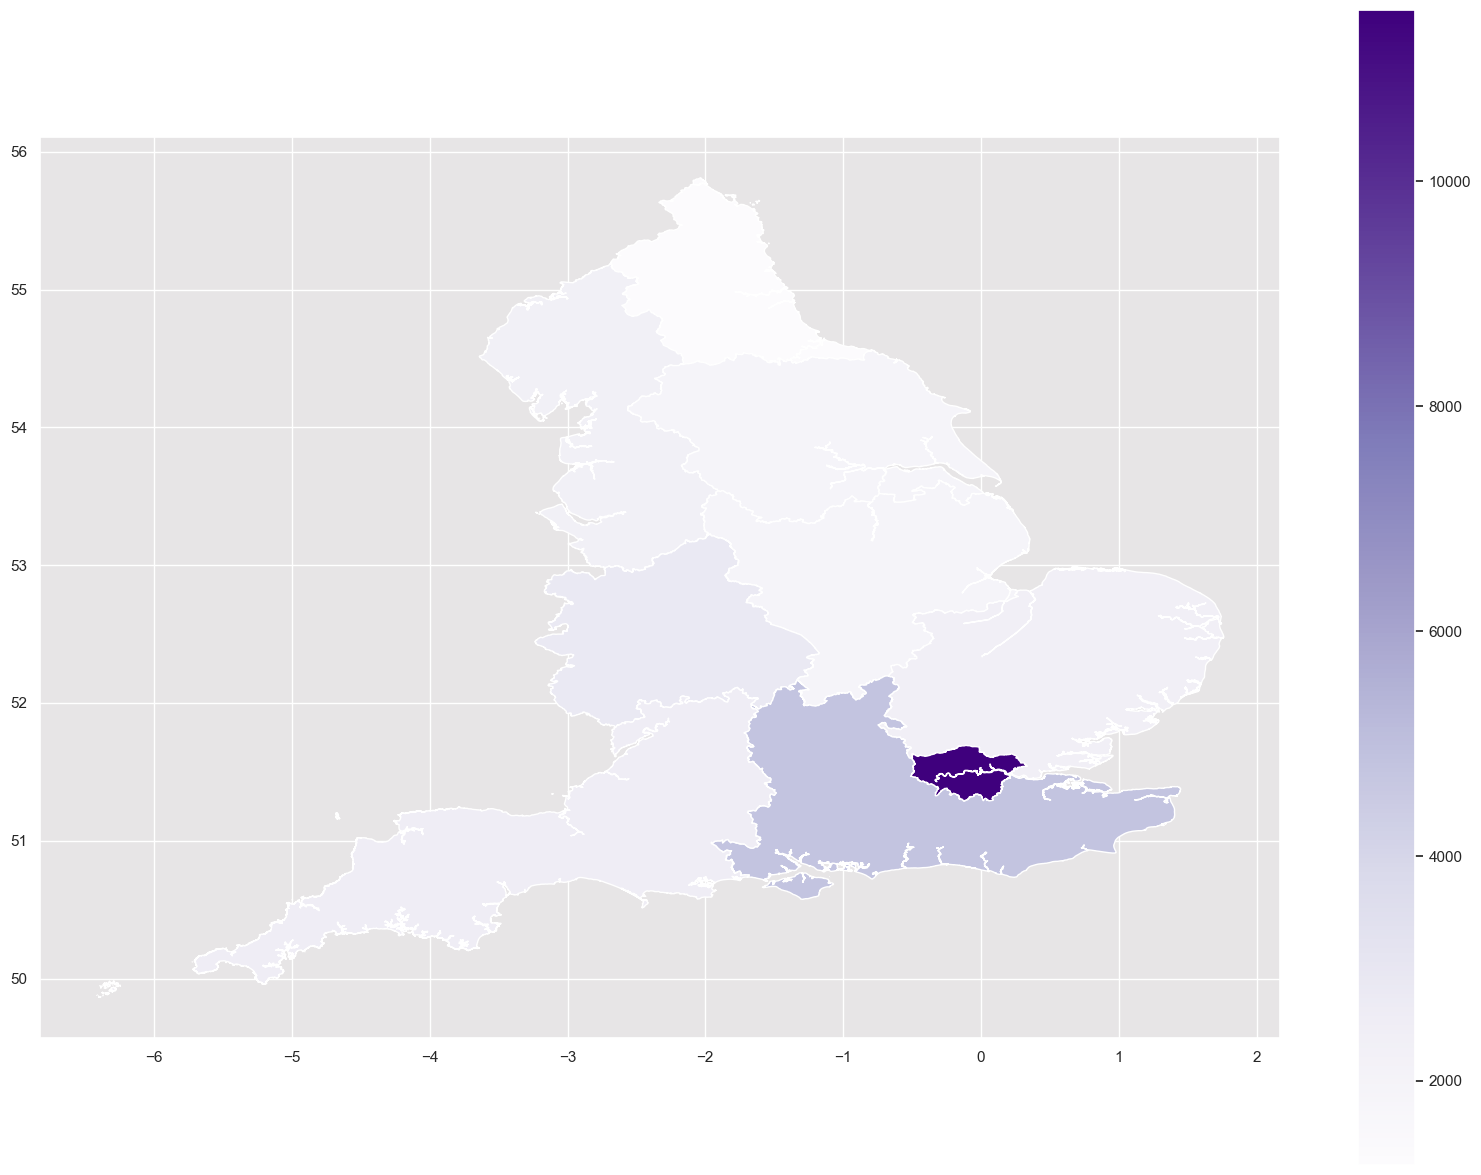

In [586]:
geo_total_chargers.plot(column='ChargingDevices',figsize=(20,15),cmap='Purples',legend=True)

# Graveyard
## Sample code to be deleted at the end

In [107]:
quarter_change=cars_data.groupby(['Fuel','YearQuarter'])['Registration'].sum().reset_index(['Fuel','YearQuarter'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'QoQ']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['QoQ']=quarter_change['QoQ']*100/quarter_change['Registration']
quarters=sorted(quarter_change['YearQuarter'].unique())
quarter_change=quarter_change[quarter_change['YearQuarter'].isin(quarters[-14:])]
 #   for quarter in quarters:

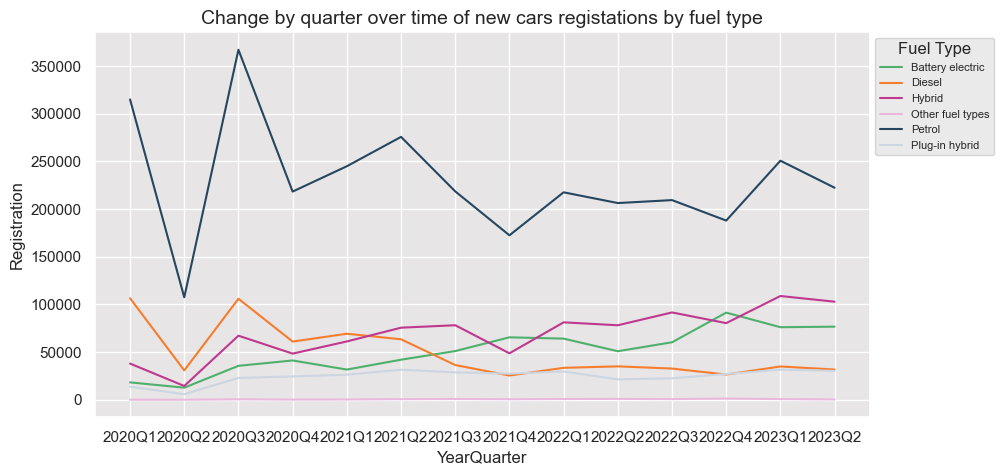

In [108]:
plt.figure(figsize=(10,5));
plt.title('Change by quarter over time of new cars registations by fuel type',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=quarter_change,x='YearQuarter',y='Registration',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=8, bbox_to_anchor=(1, 1))

In [277]:
make_reg_index=make_reg.pivot(index='Fuel',columns='Year',values='CountModels')
make_reg_index=make_reg_index[['2020','2021','2022']].divide(make_reg_index['2019'],axis=0).multiply(100).reset_index()
make_reg_index=make_reg_index.melt(id_vars=['Fuel'],var_name='Year',value_name='Index2019')
make_reg_index

,Fuel,Year,Index2019
0,Battery electric,2020,158.333333
1,Hybrid,2020,161.111111
2,Plug-in hybrid,2020,194.444444
3,Battery electric,2021,233.333333
4,Hybrid,2021,186.111111
5,Plug-in hybrid,2021,238.888889
6,Battery electric,2022,291.666667
7,Hybrid,2022,244.444444
8,Plug-in hybrid,2022,244.444444


In [ ]:
with open("geo_regions.json") as json_file:
    england_geo_regions = json.load(json_file)
    print(england_geo_regions)
